In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import ML package

from sklearn.cluster import KMeans
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.cluster.hierarchy import fcluster

In [2]:
eth_uniswap = pd.read_csv('etherum_uniswap_wallet_activities.csv')
eth_bot = pd.read_csv('eth_mev_bot.csv')

In [3]:
eth_uniswap['bot'] = np.where(eth_uniswap['from_address'].isin(eth_bot['eth_bot_address']), 1, 0) 

In [4]:
eth_uniswap.head(2)

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq,bot
0,0xa1006d0051a35b0000f961a8000000009ea8d2db,21,820,14.571429,2.000000,0
1,0x000000000dfde7deaf24138722987c9a6991e2d4,21,1588,16.714286,3.761905,1


In [5]:
eth_uniswap['bot'].value_counts()

0    304
1     63
Name: bot, dtype: int64

supervised learning with logistic regression

In [6]:
X = eth_uniswap.drop(columns = ['from_address','bot'], axis = 1)
y = eth_uniswap['bot']

In [40]:
lg_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

lg_reg.fit(X_train, y_train)
y_val_pred = lg_reg.predict(X_val)
print("Train model score: ", lg_reg.score(X_train, y_train))
print ("Val model score: ",lg_reg.score(X_val, y_val))
print ("Test model score: ",lg_reg.score(X_test, y_test))

Train model score:  0.8076923076923077
Val model score:  0.864406779661017
Test model score:  0.8513513513513513


In [35]:
# get importance
importance = lg_reg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06968
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.04589
Feature: 3, Score: -0.00557


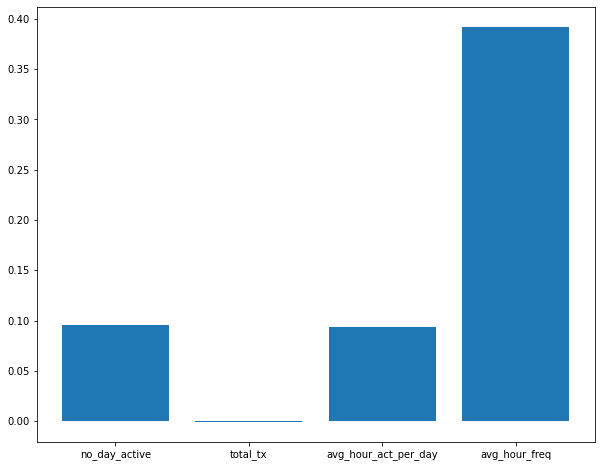

In [9]:
# get feature name
feature = np.array(X.columns)
feature_importances = pd.DataFrame(list(zip(feature,importance)), columns = ['feature','importances'])
# plot feature importance
plt.figure(figsize=(10, 8))
plt.bar(feature_importances['feature'], feature_importances['importances'])
plt.show()

In [52]:
sushiswap = pd.read_csv('etherum_sushiswap_wallet_activities.csv')

In [53]:
sushiswap.head()

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq
0,0xf314ad60c32f80671d00e3de35e44a130829b795,3,11,2.000000,1.333333
1,0x000000000035b5e5ad9019092c665357240f594e,9,1021,20.111111,5.222222
2,0x000000000000f0bc41c73af48f022f8c27b5350e,3,3,1.000000,1.000000
3,0x0ed9fa7a9222125d22502dbb4a93dd3705d777ac,4,11,2.500000,1.000000
4,0x8fe7d9643077b4ab2885cb2dad4236cc4784413f,9,233,12.333333,1.444444


In [54]:
sushi_X = sushiswap.drop(columns = ['from_address'])
sushi_X_scaled = preprocessing.MinMaxScaler().fit_transform(sushi_X)

In [55]:
sushi_pred = lg_reg.predict(sushi_X)

In [56]:
sushi_pred_df = pd.DataFrame(sushi_pred, columns = ['bot'])

In [57]:
sushiswap_pred = pd.concat([sushiswap,sushi_pred_df], axis = 1)
sushiswap_pred.head()

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq,bot
0,0xf314ad60c32f80671d00e3de35e44a130829b795,3,11,2.000000,1.333333,0
1,0x000000000035b5e5ad9019092c665357240f594e,9,1021,20.111111,5.222222,0
2,0x000000000000f0bc41c73af48f022f8c27b5350e,3,3,1.000000,1.000000,0
3,0x0ed9fa7a9222125d22502dbb4a93dd3705d777ac,4,11,2.500000,1.000000,0
4,0x8fe7d9643077b4ab2885cb2dad4236cc4784413f,9,233,12.333333,1.444444,0


In [58]:
sushiswap_pred['bot'].value_counts()

0    198
1     13
Name: bot, dtype: int64

In [59]:
sushiswap_pred[sushiswap_pred['bot']==1]

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq,bot
13,0x000000000d8aaaebcb2b0ffd69bb6e3778a39515,1,13,1.000000,13.000000,1
58,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,9,63827,24.000000,295.000000,1
106,0x51399b32cd0186bb32230e24167489f3b2f47870,9,2356,23.111111,10.666667,1
136,0xdef1c0ded9bec7f1a1670819833240f027b25eff,9,14009,24.000000,64.333333,1
143,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,9,2654,23.666667,12.000000,1
150,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,9,1678,22.444444,7.666667,1
158,0x1111111254fb6c44bac0bed2854e76f90643097d,9,16478,24.000000,75.777778,1
162,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,9,3281,23.888889,14.777778,1
163,0x0000005c9426e6910f22f0c00ed3690a4884dd6e,9,3419,23.666667,15.333333,1
174,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,9,2582,24.000000,11.444444,1
